# <center> <font color="midnightblue"> CAPSTONE PROJECT - FDNY DATA </font> </center>

<p> <strong> <font color="midnightblue"> Research Questions - 
1. What year(s) had the highest / lowest count of investigations?
2. Did Covid influence the data in anyway? 
3. Which borough(s) had the highest / lowest count of investigation?
4. Which was the most common incident type in the borough with the highest number of cases?
5. Of the boroughs with the highest number of cases, which community district had the highest count of investigations? </font> </strong>

### <font color="midnightblue"> Adding Libraries </font> 

In [43]:
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
import numpy as np

### <font color="midnightblue"> Adding Data </font> 

In [2]:
# Downloaded data as csv to desktop "downloads folder", then uploaded to Jupyter "Notebooks" folder.

df = pd.read_csv ('Bureau_of_Fire_Investigations_-_Fire_Causes_20240609.csv')

In [3]:
# To ensure data uploaded correctly, verified the output matches the NYC Open Data site 

df.shape

(53741, 10)

### <font color="midnightblue"> Data Exploration - Basic </font> 

In [4]:
# Checking Data Types for all colummns

df.dtypes

Case_Year                   int64
Case Number                 int64
Incident_DateTime          object
Borough                    object
Battalion                  object
Community_District         object
Precinct                   object
Incident_Classification    object
Cause_Fire_Description     object
Fire_Code_Category         object
dtype: object

In [5]:
# Checking statistical data

df.describe () 

,Case_Year,Case Number
count,53741.000000,53741.000000
mean,2019.336019,45863.314750
std,2.381225,24401.648624
min,2016.000000,0.000000
25%,2017.000000,30054.000000
50%,2019.000000,40435.000000
75%,2021.000000,77092.000000
max,2024.000000,80298.000000


In [6]:
# Checking the first 5 rows of data

df.head ()

,Case_Year,Case Number,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
0,2016,40001,01/01/2016 12:08:00 AM,Queens,50,8,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
1,2016,50001,01/01/2016 12:13:00 AM,Staten Island,21,2,122,PD Residential Structure,Incendiary - Combustible Material,Incendiary
2,2016,40002,01/01/2016 12:21:00 AM,Queens,37,5,104,MD Residential Structure,Incendiary - Combustible Material,Incendiary
3,2016,60001,01/01/2016 12:29:00 AM,Bronx,15,12,47,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
4,2016,40003,01/01/2016 12:32:00 AM,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary


In [7]:
# Checking the last 5 rows of data

df.tail ()

,Case_Year,Case Number,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
53736,2024,20357,05/02/2024 06:21:00 AM,Bronx,27,12,47,NaN,Preliminary Investigation Only,Other
53737,2024,20358,05/02/2024 06:48:00 AM,Bronx,19,7,50,NaN,Preliminary Investigation Only,Other
53738,2024,10229,05/03/2024 11:37:00 AM,Manhattan,10,8,19,Commercial Structure,Preliminary Investigation Only,Other
53739,2024,30440,05/03/2024 03:14:00 PM,Brooklyn,33,14,63,MD Residential Structure,Preliminary Investigation Only,Other
53740,2024,40405,05/03/2024 05:07:00 PM,Queens,52,8,107,Street,Preliminary Investigation Only,Other


In [8]:
# Checking count of non null data points 

df.count ()

Case_Year                  53741
Case Number                53741
Incident_DateTime          53741
Borough                    53481
Battalion                  46083
Community_District         53403
Precinct                   53397
Incident_Classification    52914
Cause_Fire_Description     53668
Fire_Code_Category         53680
dtype: int64

In [9]:
# Checking for count of standard null values

df.isnull().sum()

Case_Year                     0
Case Number                   0
Incident_DateTime             0
Borough                     260
Battalion                  7658
Community_District          338
Precinct                    344
Incident_Classification     827
Cause_Fire_Description       73
Fire_Code_Category           61
dtype: int64

In [10]:
# Checking for non standard values

df['Borough'].unique()

array(['Queens', 'Staten Island', 'Bronx', 'Manhattan', 'Brooklyn',
       'Outside of NYC', nan], dtype=object)

In [11]:
df['Community_District'].unique()

array(['8', '2', '5', '12', '4', '10', '7', '11', '3', '1', '6', '9',
       '18', '13', '16', '14', '17', 'Out of NYC', '15', nan],
      dtype=object)

In [12]:
df['Incident_Classification'].unique()

array(['MD Residential Structure', 'PD Residential Structure',
       'Burn Notification (Albany)', 'Other', 'Burn Notification',
       'Outside Rubbish', 'Commercial Structure', 'Group Home', 'Vehicle',
       'Government Structure', 'Boat', 'MFA', 'Garage/Shed', 'Hotel',
       'Nursing Home', 'Brush', 'Hospital', 'Religious Structure',
       'Manhole', 'School', 'No Fire', 'Transformer', 'Street',
       'Possible Single Room Occupancy', 'Public Hallway',
       'Public Structure', 'Threat to Burn', 'Transit', 'Sidewalk',
       'Construction Trailer', 'Aircraft', 'Construction Vehicle', nan,
       'Miscellaneous'], dtype=object)

In [13]:
df['Fire_Code_Category'].unique()

array(['Smoking', 'Incendiary', 'Other', 'Open Flame', 'No Fire',
       'Electrical Devices', 'Cooking Carelessness', 'Electrical',
       'Motors', 'Hot Objects', 'Heaters', 'Appliances',
       'Natural Sources', nan, 'Ignitable', 'Cooking'], dtype=object)

In [14]:
df['Cause_Fire_Description'].unique()

array(['Smoking (Cigarette/Cigar)', 'Incendiary - Combustible Material',
       'Albany Burn Notif. Unrelated to a Fire/Explosion', 'Candle',
       'Other - Open Flame', 'Other - No Fire', 'Computer Component(s)',
       'Food on the Stove',
       'Albany Burn Notif. Related to a Previous BFI Inv.', 'Incendiary',
       'Preliminary Investigation Only', 'Electrical Wiring',
       'Cooking Fire Extending to Clothing or Combustibles',
       'Incendiary - Ignitable Liquid', 'Fireplace', 'Vehicle Wiring',
       'Extension Cord', 'Holiday Lighting', 'Other - Electrical',
       'Other Motor', 'Motors - Fan', 'Child Playing w/ Other Open Flame',
       'Juvenile Firesetter Intervention', 'Other - Hot Objects',
       'Portable Heater - Kerosene', 'Clothes Dryer - Natural Gas', 'MFA',
       'Motors - Fossil Fuel Powered', 'Permanent Heater - Gas',
       'Incense', 'Matches/Lighter', 'Lighting Fixture',
       'Permanent Heater', 'Albany Burn Notif. / Pending Investigation',
       'Sto

### <font color="midnightblue"> Data Exploration - Detailed </font> 

In [15]:
# Grouping data to view counts for row info

df.groupby (['Borough'])['Case Number'].count()

Borough
Bronx             12268
Brooklyn          15823
Manhattan         10381
Outside of NYC       77
Queens            12169
Staten Island      2763
Name: Case Number, dtype: int64

In [16]:
df.groupby (['Fire_Code_Category'])['Case Number'].count()

Fire_Code_Category
Appliances               1038
Cooking                   116
Cooking Carelessness     2128
Electrical               8127
Electrical Devices         85
Heaters                   451
Hot Objects              1885
Ignitable                 341
Incendiary              10755
Motors                    590
Natural Sources           278
No Fire                  2135
Open Flame               2373
Other                   18315
Smoking                  5063
Name: Case Number, dtype: int64

In [17]:
df.groupby (['Cause_Fire_Description'])['Case Number'].count()

Cause_Fire_Description
Aerosol Can                                            21
Albany Burn Notif. / Pending Investigation            200
Albany Burn Notif. Related to a Previous BFI Inv.     533
Albany Burn Notif. Unrelated to a Fire/Explosion     1899
Appliance Cord                                        192
                                                     ... 
Torch - Legal Use of                                  373
Transformer                                            63
Under Investigation                                    16
Vehicle Wiring                                        454
Washer/Dryer Combo                                      6
Name: Case Number, Length: 134, dtype: int64

In [18]:
df.groupby (['Incident_Classification'])['Case Number'].count()

Incident_Classification
Aircraft                             14
Boat                                 71
Brush                               242
Burn Notification                  1365
Burn Notification (Albany)         1304
Commercial Structure               3352
Construction Trailer                 26
Construction Vehicle                 11
Garage/Shed                         586
Government Structure                173
Group Home                          163
Hospital                            152
Hotel                               160
MD Residential Structure          20561
MFA                                 843
Manhole                             179
Miscellaneous                        50
No Fire                             761
Nursing Home                         40
Other                              2404
Outside Rubbish                    2249
PD Residential Structure           6781
Possible Single Room Occupancy       30
Public Hallway                       70
Public Structure

### <font color="midnightblue"> Data Cleaning Part 1</font>

In [19]:
# Reloading df non-standard missing values "Outside of NYC" as missing values, and dropping missing values (focus is 5 bor only)

missing_values = ["Outside of NYC","Out of NYC","No Fire"]
df = pd.read_csv ('Bureau_of_Fire_Investigations_-_Fire_Causes_20240609.csv',na_values = missing_values).dropna()

In [20]:
# Checking missing values were dropped 

df.groupby (['Borough'])['Case Number'].count()

Borough
Bronx            10088
Brooklyn         12831
Manhattan         8105
Queens            9617
Staten Island     2224
Name: Case Number, dtype: int64

In [21]:
# Checking missing values were dropped 

df.groupby (['Community_District'])['Case Number'].count()

Community_District
1.0     4611
2.0     2685
3.0     4026
4.0     2749
5.0     3756
6.0     2160
7.0     2624
8.0     2188
9.0     2886
10.0    2552
11.0    2353
12.0    4149
13.0    1509
14.0    1411
15.0     554
16.0     878
17.0     890
18.0     884
Name: Case Number, dtype: int64

In [22]:
# Subset data from df to df1 which will contain only the columns interested in viewing and checking output is correct 

df [['Case_Year', 'Case Number', 'Borough', 'Community_District', 'Incident_Classification', 'Cause_Fire_Description', 'Fire_Code_Category']]
df1 = df [['Case_Year', 'Case Number', 'Borough', 'Community_District', 'Incident_Classification', 'Cause_Fire_Description', 'Fire_Code_Category']]

df1.head (1)

,Case_Year,Case Number,Borough,Community_District,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
0,2016,40001,Queens,8.0,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking


In [39]:
# Renamed Column names for uniformity and checking output matches the needed columns

df1 = df1.rename(columns={'Case_Year' : 'Case Year', 'Community_District' : 'Community District', 'Incident_Classification' : 'Incident Classification', 'Cause_Fire_Description' : 'Cause Fire Description', 'Fire_Code_Category' : 'Fire Code Category'})

df1.head(1)

,Case Year,Case Number,Borough,Community District,Incident Classification,Cause Fire Description,Fire Code Category
0,2016,40001,Queens,8.0,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking


### <font color="midnightblue"> Visualizations Part 1 </font>

[Text(0.5, 1.0, 'Investigations by Case Year'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Count')]

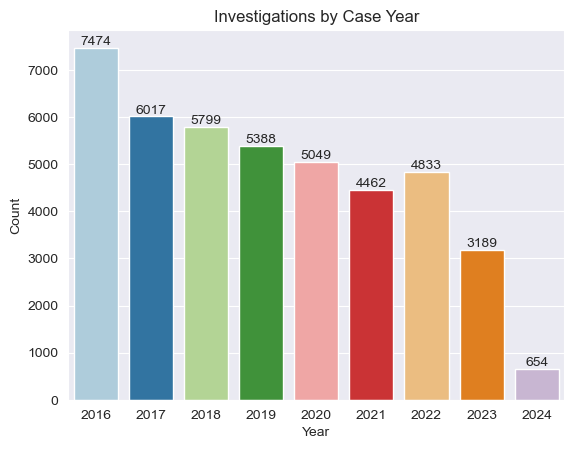

In [27]:
# Visualization for Case Year 

ax = sns.countplot (x = 'Case Year', palette = "Paired", data = df1)
sns.set_style('darkgrid')
for container in ax.containers:
    ax.bar_label(container)
ax.set (title = 'Investigations by Case Year', xlabel = 'Year', ylabel = 'Count')

[Text(0.5, 1.0, 'Investigations by Year and Borough'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Count')]

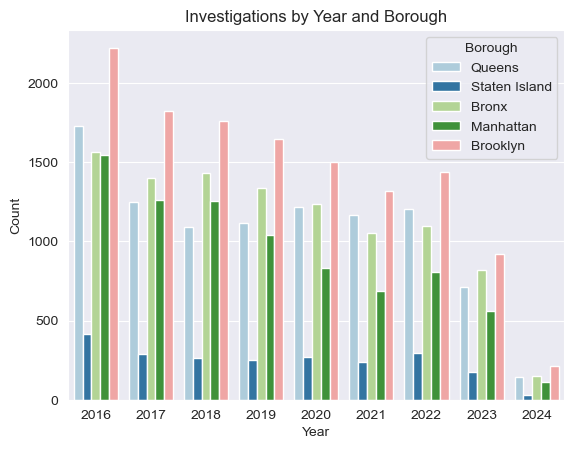

In [41]:
# Visualization for Case Year + Borough - Added hue to add a layer of data for , assigned color palette, changed background to dark grid

ax = sns.countplot (x = 'Case Year', hue = 'Borough', palette = "Paired", data = df1)
sns.set_style('darkgrid')

ax.set (title = 'Investigations by Year and Borough', xlabel = 'Year', ylabel = 'Count') 

### <font color="midnightblue"> Data Cleaning Part 2 </font>

In [64]:
# Subset data from df1 to df2 which will contain only the data for Brooklyn 

df1[(df1['Borough'] == 'Brooklyn')]
df2 = df1[(df1['Borough'] == 'Brooklyn')]

df2

,Case Year,Case Number,Borough,Community District,Incident Classification,Cause Fire Description,Fire Code Category
6,2016,77003,Brooklyn,2.0,PD Residential Structure,Other - Open Flame,Open Flame
9,2016,77004,Brooklyn,4.0,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
16,2016,60046,Brooklyn,3.0,Burn Notification,Albany Burn Notif. Related to a Previous BFI Inv.,Other
17,2016,30001,Brooklyn,3.0,PD Residential Structure,Smoking (Cigarette/Cigar),Smoking
22,2016,77036,Brooklyn,3.0,Outside Rubbish,Incendiary,Incendiary
...,...,...,...,...,...,...,...
53709,2024,30404,Brooklyn,11.0,PD Residential Structure,Electrical Wiring,Electrical
53711,2024,30407,Brooklyn,9.0,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
53716,2024,30413,Brooklyn,15.0,Outside Rubbish,Incendiary,Incendiary
53731,2024,30424,Brooklyn,15.0,Transformer,Preliminary Investigation Only,Other


In [91]:
# Grouping districts to see whici had the highest amount of cases

df2.groupby (['Community District'])['Case Number'].count().sort_values()
df3= df2.groupby (['Community District'])['Case Number'].count().sort_values(ascending=False).head(5)

df3

Community District
5.0     1446
3.0     1078
1.0     1010
17.0     887
18.0     884
Name: Case Number, dtype: int64

[Text(0.5, 1.0, 'Investigations by Community Districts in Brooklyn'),
 Text(0.5, 0, 'Community District'),
 Text(0, 0.5, 'Count')]

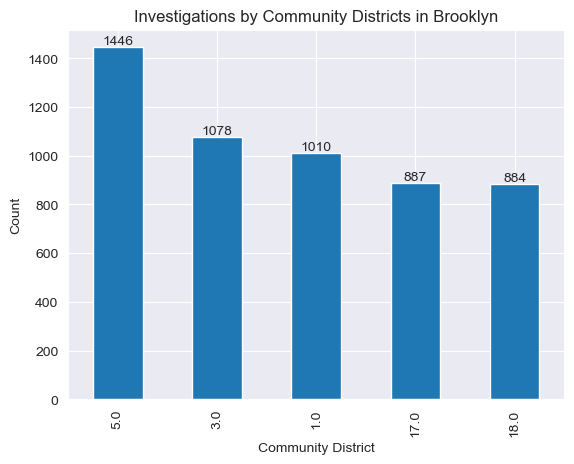

In [95]:
# Visualization for the top 10 community districts in broklyn with the highest # of investigations

ax = df3.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
ax.set (title = 'Investigations by Community Districts in Brooklyn', xlabel = 'Community District', ylabel = 'Count') 

### <font color="midnightblue"> Visualizaton Part 2 </font>

[Text(0.5, 1.0, 'Investigations by Incident Classification in Brooklyn'),
 Text(0.5, 0, 'Incident Classification'),
 Text(0, 0.5, 'Count')]

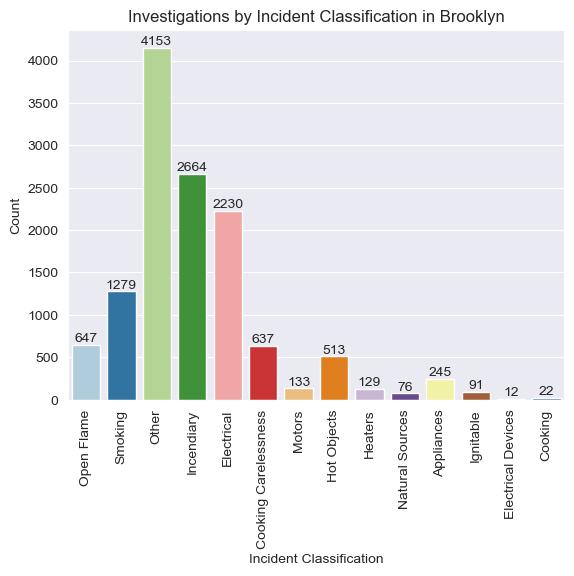

In [97]:
# Visualization for Fire Code Category

ax = sns.countplot(x="Fire Code Category", data=df2, palette="Paired")
ax.tick_params(axis='x', rotation=90)
for container in ax.containers:
    ax.bar_label(container)
ax.set (title = 'Investigations by Incident Classification in Brooklyn', xlabel = 'Incident Classification', ylabel = 'Count') 

 ### <font color="midnightblue"> Conclusion </font>

Since there are ongoing investigations for 2024, we are focusing on data for the previous years. From the first visualization, we learn that year 2016 had the highest number of investigations, followed by 2017. Since then, there has been a consistent decrease in the count of investigations. There is a correlation between the decrease in investigations during the peak of covid during 2020 - 2021. From the second visualiation, we learn that Brooklyn had the highest count of investigations in all the boroughs, and Staten Island had the lowest count. The third visualization shows us the most common incident types are Other, Incendiary, Electrical, Smoking, and Open Flame. Lastly, Brooklyn Community District 5, had the highest count of investigations. To summarize, resources should be directed to Brooklyn District 5 where incidents are the highest and public education should be provided on incendiary and electrical fires. 